### Cars 데이터를 활용한 단순 선형회귀 예제

1920년대의 차량이 달리는 속도와 그 속도에서 브레이크를

잡았을때 제동거리를 측정한 데이터.

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats
import numpy as np
from statsmodels.formula.api import ols

In [5]:
df = pd.read_excel('http://itpaper.co.kr/data/cars.xlsx', engine='openpyxl')
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


#### 데이터 분포 확인

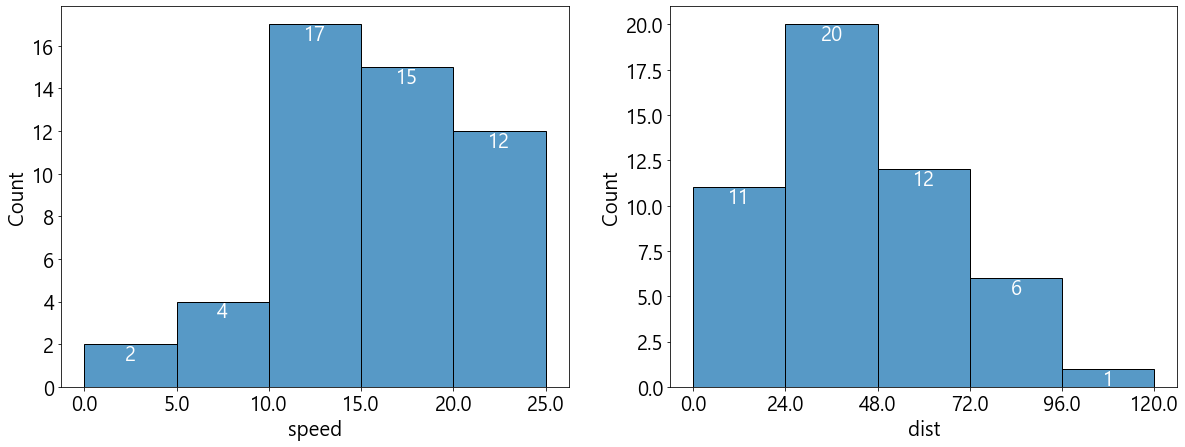

In [7]:
# 속도와 제동거리에 대한 히스토그램

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

for i, v in enumerate(df.columns):
    # numpy를 통한 히스토그램 추출
    # n -> 빈도수, bins -> 구간정보
    n, bins = np.histogram(df[v], bins=5, range=(0, df[v].max()))
    # 히스토그램 그리기
    sns.histplot(x=v, data=df, bins=5, binrange=(0, df[v].max()), ax=ax[i])
    
    ax[i].set_xticks(bins)
    ax[i].set_xticklabels(bins)
    ax[i].set_xlabel(v)

    # 출력할 데이터 수 만큼 반복
    for j, w in enumerate(n):    
        x = bins[j] + ((bins[j+1]-bins[j]) / 2)

        # 텍스트 출력 -> x좌표, y좌표, 내용, 글자크기, 색상, 텍스트가로정렬, 세로정렬
        ax[i].text(x, w, str(int(w)), fontsize=20, color='#ffffff', horizontalalignment='center', verticalalignment='top')
    
plt.show()

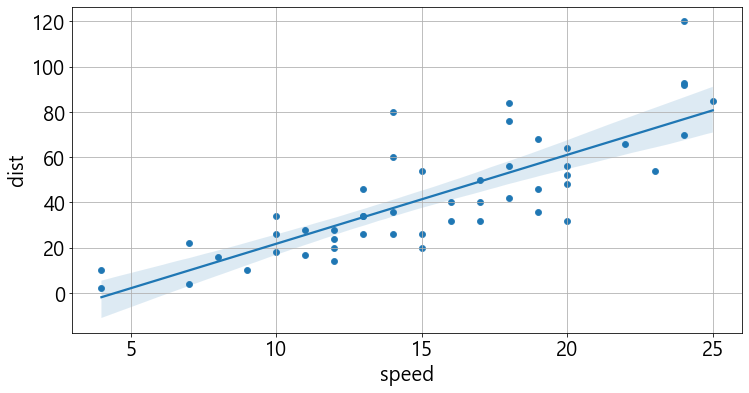

In [8]:
# 산점도 그래프를 통한 데이터 분포 조사

plt.rcParams["figure.figsize"] = (12, 6)

# 산점도 그래프
sns.scatterplot(x='speed', y='dist', data=df)
# 추세선 표시
sns.regplot(x='speed', y='dist', data=df)
plt.xlim(df['speed'].min()-1, df['speed'].max()+1)
plt.grid()
plt.show()

### statsmodels을 활용하여 속도에 따른 제동거리에 대한 회귀분석

In [10]:
# 회귀분석 수행
# speed에 따른 dist의 회귀분석 (R스타일 코딩)
model = ols('dist ~ speed', data=df)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           1.49e-12
Time:                        10:16:19   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 잔차분석을 통한 4대 가정 검정

In [11]:
# 잔차 구하기

res_df = pd.DataFrame(fit.resid)
res_df.head()

,0
0,3.849460
1,11.849460
2,-5.947766
3,12.052234
4,2.119825


In [12]:
# 잔차에 대한 요약 통계량

res_df.describe()

,0
count,5.000000e+01
mean,6.536993e-15
std,1.522184e+01
min,-2.906908e+01
25%,-9.525321e+00
50%,-2.271854e+00
75%,9.214715e+00
max,4.320128e+01


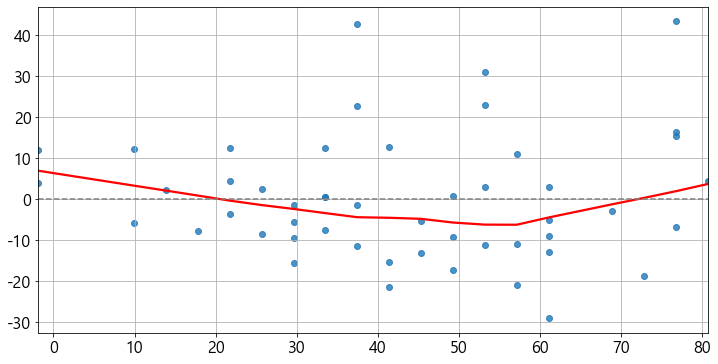

In [13]:
# 선형성 확인

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 예측값
fitted = fit.predict(df)
# 잔차(실데이터-예측값)
residual = df['dist'] - fitted

sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.grid()

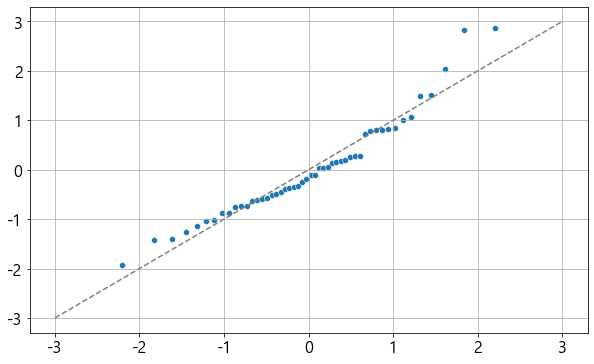

In [14]:
# 잔차의 정규성

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 잔차의 표준값 (평균으로부터 얼마나 떨어져 있는가에 대한 값, 음수=평균이하, 양수=평균이상)
sr = scipy.stats.zscore(residual)
(x, y), fig = scipy.stats.probplot(sr)
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], linestyle='--', color='grey')
plt.grid()

plt.show()

In [15]:
# 잔차의 정규성 샤피로 검정

scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9450905919075012, pvalue=0.02152460627257824)

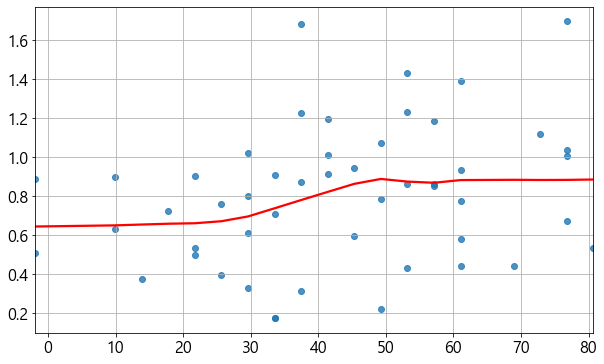

In [16]:
# 잔차의 등분산성 확인

sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.grid()
plt.show()

#### 결과 보고

In [18]:
# 절편과 기울기를 따로 조회하여 회귀식 구성

a = fit.params.speed     ## 기울기
b = fit.params.Intercept ## 절편
print("y = %fx + %f" % (a, b))

y = 3.932409x + -17.579095


In [20]:
# 학습에 사용된 반응변수(x)에 따른 설명변수(y)의 추정치

fit.fittedvalues

0     -1.849460
1     -1.849460
2      9.947766
3      9.947766
4     13.880175
5     17.812584
6     21.744993
7     21.744993
8     21.744993
9     25.677401
10    25.677401
11    29.609810
12    29.609810
13    29.609810
14    29.609810
15    33.542219
16    33.542219
17    33.542219
18    33.542219
19    37.474628
20    37.474628
21    37.474628
22    37.474628
23    41.407036
24    41.407036
25    41.407036
26    45.339445
27    45.339445
28    49.271854
29    49.271854
30    49.271854
31    53.204263
32    53.204263
33    53.204263
34    53.204263
35    57.136672
36    57.136672
37    57.136672
38    61.069080
39    61.069080
40    61.069080
41    61.069080
42    61.069080
43    68.933898
44    72.866307
45    76.798715
46    76.798715
47    76.798715
48    76.798715
49    80.731124
dtype: float64

In [21]:
# 새로운 speed값에 대응하는 y값 예측하기

fit.predict({'speed': list(range(10, 15))})

0    21.744993
1    25.677401
2    29.609810
3    33.542219
4    37.474628
dtype: float64

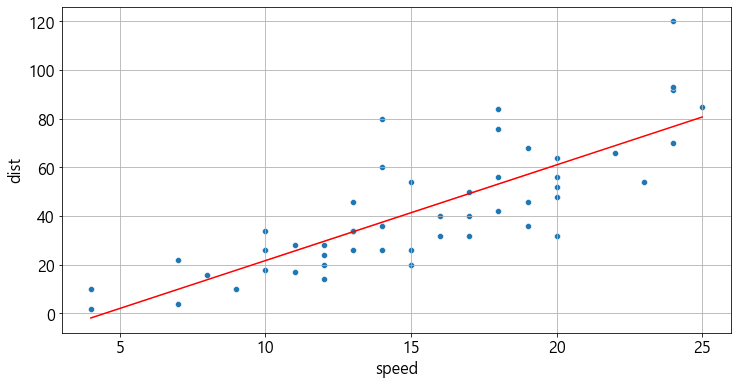

In [22]:
# 회귀식을 활용하여 산점도 그래프 위에 추세선 그리기

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 16

sns.scatterplot(x='speed', y='dist', data=df)

# 학습에 사용된 반응변수(x)에 따른 설명변수(y)의 추정치를 활용하여 직선 추가
sns.lineplot(x='speed', y=fit.fittedvalues, data=df, color='red')

plt.xlim(df['speed'].min()-1, df['speed'].max()+1)
plt.grid()
plt.show()

### Cars93 데이터 셋의 다중 회귀 분석

In [23]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
df = pd.read_excel('http://itpaper.co.kr/data/cars93.xlsx', engine='openpyxl')
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


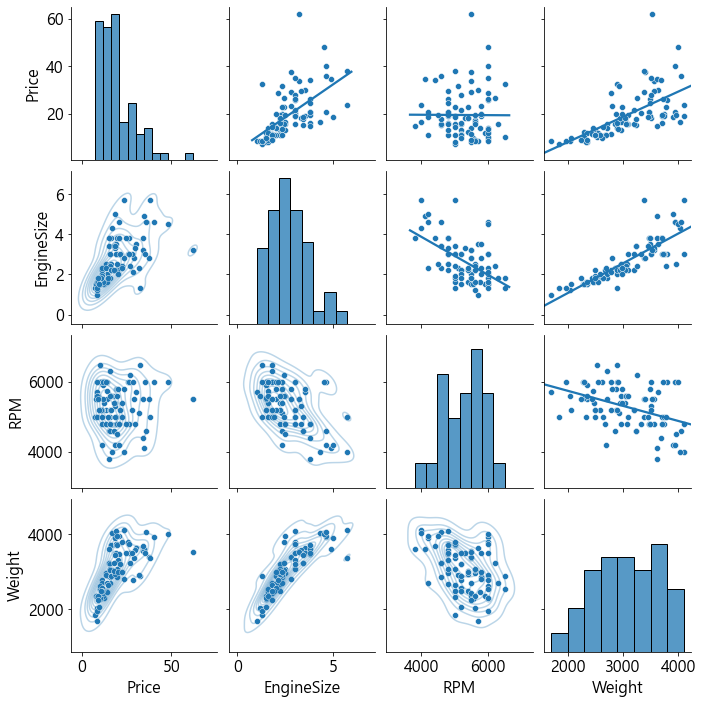

In [26]:
# 데이터 분포 확인

g = sns.pairplot(df.filter(['Price', 'EngineSize', 'RPM', 'Weight']))
g.map_upper(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)
plt.show()

#### 회귀분석 수행

In [27]:
# 엔진크기, RPM, 무게에 따른 자동차 가격 예측

model = ols('Price ~ EngineSize + RPM + Weight', data=df)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           6.75e-16
Time:                        10:20:32   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 다중 공선성 확인

In [28]:
# 절편을 포함한 분석에 사용된 모든 독립변수명 리스트

model.exog_names

['Intercept', 'EngineSize', 'RPM', 'Weight']

In [30]:
# 절편을 제외한 나머지 독립변수들에 대한 VIF값 확인

for i in range(1, len(model.exog_names)):
    vif = variance_inflation_factor(model.exog, i)
    print("%s의 VIF: %f" % (model.exog_names[i], vif))

EngineSize의 VIF: 4.108869
RPM의 VIF: 1.437810
Weight의 VIF: 3.520026


#### 4대 기본가정 확인

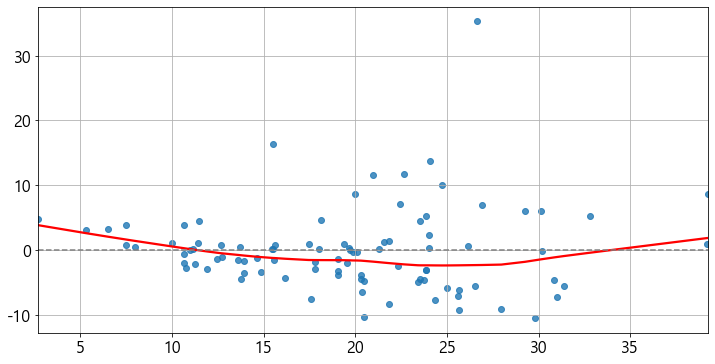

In [31]:
# 선형성

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# Price에 대한 예측값
fitted = fit.predict(df)
# 잔차(Price에 대한 실데이터 - Price에 대한 예측값)
residual = df['Price'] - fitted
# 빨간실선 (잔차의 추세선)
sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color': 'red'})
# 점선 (y축이 0인 직선)
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.grid()
plt.show()

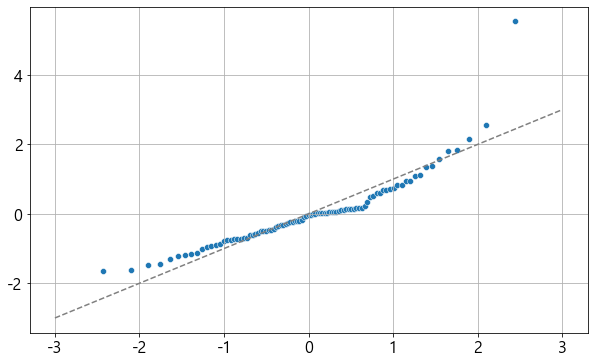

In [32]:
# 잔차의 정규성

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 잔차의 표준값 (평균으로부터 얼마나 떨어져 있는가에 대한 값, 음수=평균이하, 양수=평균이상)
sr = scipy.stats.zscore(residual)
(x, y), fig = scipy.stats.probplot(sr)
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], linestyle='--', color='grey')
plt.grid()
plt.show()

In [34]:
# 잔차의 정규성 샤피로 검정

scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.8587311506271362, pvalue=5.97627476395246e-08)

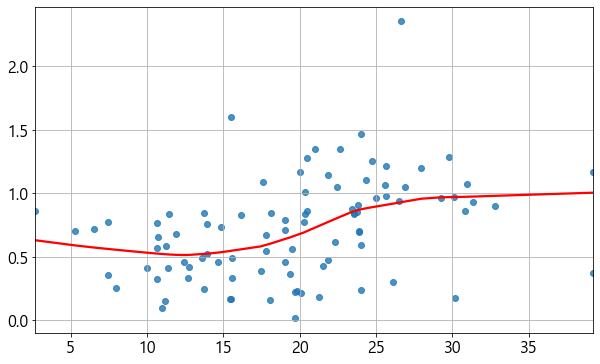

In [35]:
# 잔차의 등분산성 확인

sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.grid()
plt.show()

#### 결과보고

In [36]:
# 계수를 표준화 하기

scipy.stats.zscore(fit.params)

Intercept    -1.727054
EngineSize    0.699638
RPM           0.513704
Weight        0.513712
dtype: float64

In [37]:
# 회귀식을 구성하기 위한 모든 항목 조회

a = fit.params
a

Intercept    -51.793292
EngineSize     4.305387
RPM            0.007096
Weight         0.007271
dtype: float64

In [38]:
# 회귀식 구성하기

print("y = %f * EngineSize + %f * RPM + %f * Weight + %f" 
          % (a['EngineSize'], a['RPM'], a['Weight'], a['Intercept']))

y = 4.305387 * EngineSize + 0.007096 * RPM + 0.007271 * Weight + -51.793292


In [39]:
# 학습에 사용된 반응변수(x)에 따른 설명변수(y)의 추정치

fit.fittedvalues

0     20.332440
1     26.899639
2     23.832325
3     24.050459
4     30.192235
        ...    
88    19.697871
89    19.681209
90    21.853071
91    18.134246
92    26.132438
Length: 93, dtype: float64

In [40]:
# 새로운 엔진크기, RPM, 무게에 따른 자동차 가격 추정치

fit.predict({'EngineSize': list(range(10, 30)), 'RPM': list(range(30, 50)), 'Weight': list(range(1000, 1020))})

0     -1.255401
1      3.064353
2      7.384108
3     11.703862
4     16.023616
5     20.343370
6     24.663125
7     28.982879
8     33.302633
9     37.622387
10    41.942142
11    46.261896
12    50.581650
13    54.901405
14    59.221159
15    63.540913
16    67.860667
17    72.180422
18    76.500176
19    80.819930
dtype: float64

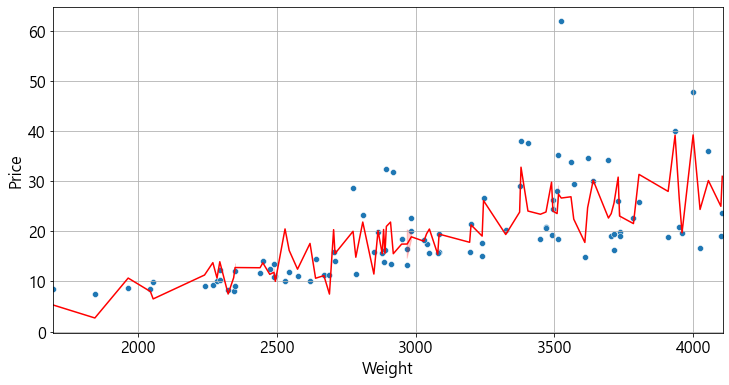

In [41]:
# 회귀식을 활용하여 산점도 그래프 위에 추세선 그리기

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 16

sns.scatterplot(x='Weight', y='Price', data=df)

# 학습에 사용된 설명변수(x)에 따른 반응변수(y)의 추정치를 활용하여 직선 추가
sns.lineplot(x='Weight', y=fit.fittedvalues, data=df, color='red')

plt.xlim(df['Weight'].min()-1, df['Weight'].max()+1)
plt.grid()
plt.show()

### 로지스틱 회귀분석

In [42]:
import pandas as pd
from statsmodels.formula.api import logit
import numpy as np

In [43]:
df = pd.read_excel('http://itpaper.co.kr/data/gradeuate.xlsx', engine='openpyxl')
df

,합격여부,필기점수,학부성적,병원경력
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [44]:
model = logit('합격여부 ~ 필기점수+학부성적+병원경력', data=df)
fit = model.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.574302
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   합격여부   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Tue, 03 Aug 2021   Pseudo R-squ.:                 0.08107
Time:                        10:26:05   Log-Likelihood:                -229.72
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 8.207e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4495      1.133     -3.045      0.002      -5.670      -1.229
필기점수           0.0023      0.

#### 결과해석

In [46]:
# 오즈비 확인
np.exp(fit.params)

Intercept    0.031760
필기점수         1.002297
학부성적         2.174967
병원경력         0.571191
dtype: float64

#### 분류 정확도 파악

In [48]:
# 혼돈 행렬 얻기

conf_tab = fit.pred_table()
conf_tab

array([[253.,  20.],
       [ 98.,  29.]])

In [49]:
# 데이터프레임으로 변환

conf_df = pd.DataFrame(conf_tab, 
                    index=['True','False'], 
                    columns=['Positive', 'Negative'])
conf_df

,Positive,Negative
True,253.0,20.0
False,98.0,29.0


In [51]:
# 분류 정확도 계산 

k = (conf_df['Positive']['True']+conf_df['Negative']['False']) / len(df)
print('분류 정확도 :', k)

분류 정확도 : 0.705


#### 추정치를 통한 분류작업 수행

In [52]:
# 추정치 얻기

pred2 = fit.predict(df)
pred2

0      0.189553
1      0.317781
2      0.717814
3      0.148949
4      0.097954
         ...   
395    0.490176
396    0.184989
397    0.186814
398    0.468108
399    0.325045
Length: 400, dtype: float64

In [54]:
# 데이터 프레임으로 변환

pdf = pd.DataFrame(pred2, columns=['추정치'])
pdf['합격확률(%)'] = round(pdf['추정치']*100, 1)
pdf['예상결과'] = np.where(pdf['추정치'] > 0.5, "합격", "불합격")

result_df = pd.merge(df, pdf, left_index=True, right_index=True)
result_df

,합격여부,필기점수,학부성적,병원경력,추정치,합격확률(%),예상결과
0,0,380,3.61,3,0.189553,19.0,불합격
1,1,660,3.67,3,0.317781,31.8,불합격
2,1,800,4.00,1,0.717814,71.8,합격
3,1,640,3.19,4,0.148949,14.9,불합격
4,0,520,2.93,4,0.097954,9.8,불합격
...,...,...,...,...,...,...,...
395,0,620,4.00,2,0.490176,49.0,불합격
396,0,560,3.04,3,0.184989,18.5,불합격
397,0,460,2.63,2,0.186814,18.7,불합격
398,0,700,3.65,2,0.468108,46.8,불합격


In [55]:
# 예상결과에 대한 빈도수 검사

k = result_df['예상결과'].value_counts()
k

불합격    351
합격      49
Name: 예상결과, dtype: int64

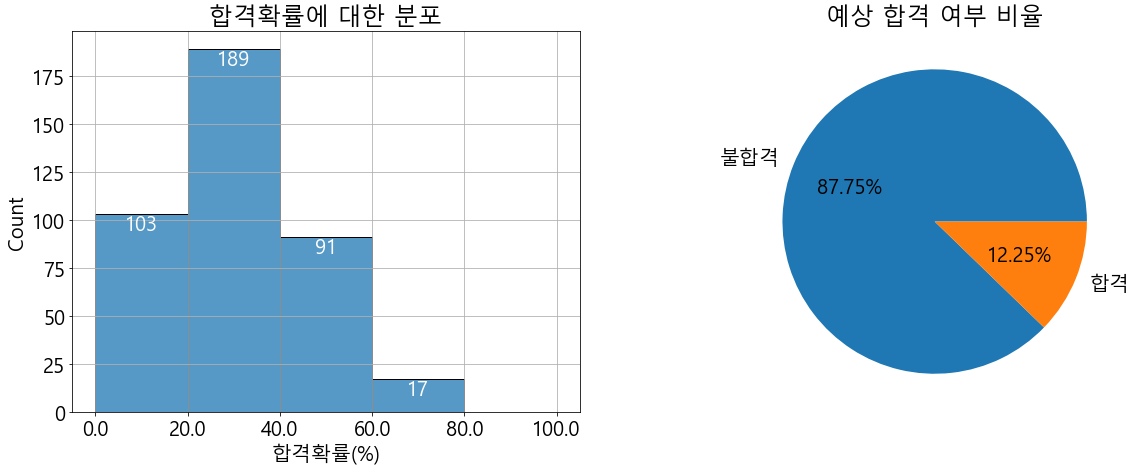

In [56]:
# 합격확률에 대한 히스토그램과 예상결과 빈도 그래프

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

n, bins = np.histogram(result_df['합격확률(%)'], bins=5, range=(0, 100))
sns.histplot(x='합격확률(%)', data=result_df, bins=5, binrange=(0, 100), ax=ax[0])
ax[0].set_xticks(bins)
ax[0].set_xticklabels(bins)
ax[0].grid()
ax[0].set_title('합격확률에 대한 분포')

# 출력할 데이터 수 만큼 반복
for j, w in enumerate(n):    
    x = bins[j] + ((bins[j+1]-bins[j]) / 2)
    ax[0].text(x, w, str(int(w)), fontsize=20, color='#ffffff', horizontalalignment='center', verticalalignment='top')

ax[1].pie(k, labels=k.index, autopct='%.2f%%')
ax[1].set_title('예상 합격 여부 비율')

plt.show()